In [1]:
# Import Necessary Libraries 

import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import urllib.request as ur
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

## Here we will be considering two group, in which one group consist of Apple Inc and IBM company  and the Second group consist of The Walt Disney company and Delta Airlines. 

In [2]:
tickers1=['AAPL','IBM']
tickers2=['DIS','DAL']
data1=pd.DataFrame()
data2=pd.DataFrame()
for t in tickers1:
    data1[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Adj Close']
for t in tickers2:
    data2[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Adj Close']

# Portfolio Analysis

<function matplotlib.pyplot.show(*args, **kw)>

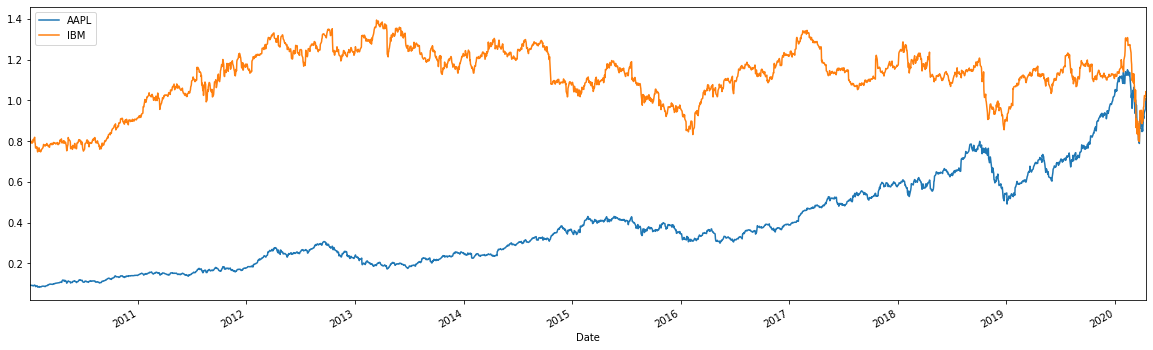

In [3]:
(data1/data1.iloc[-1]).plot(figsize=(20,6))
plt.show

In [9]:
data1.head()

,AAPL,IBM
Date,,
2010-01-04,26.538483,95.994934
2010-01-05,26.584366,94.835304
2010-01-06,26.161509,94.219246
2010-01-07,26.113146,93.893105
2010-01-08,26.286753,94.835304


In [4]:
data1.iloc[-1]

AAPL    284.429993
IBM     118.690002
Name: 2020-04-15 00:00:00, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

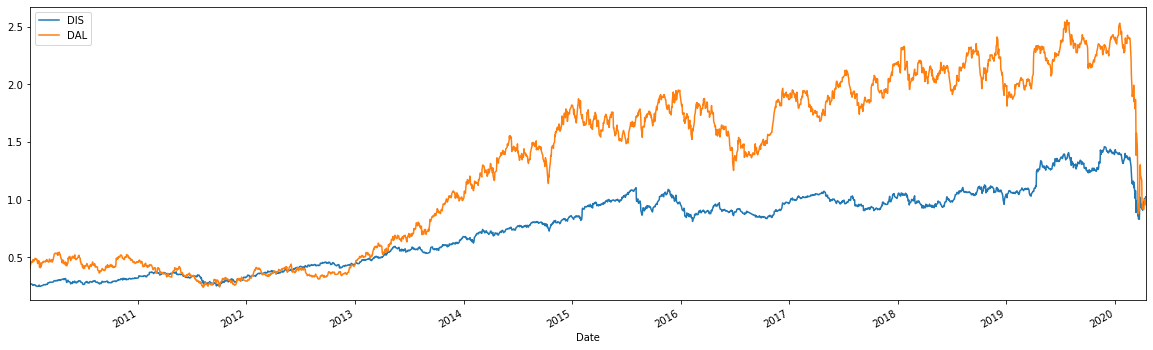

In [6]:
(data2/data2.iloc[-1]).plot(figsize=(20,6))
plt.show

# Portfolio Return

In [13]:
returns1=(data1/data1.shift(1))-1
returns2=(data2/data2.shift(1))-1

In [15]:
data1.shift(1)

,AAPL,IBM
Date,,
2010-01-04,NaN,NaN
2010-01-05,26.538483,95.994934
2010-01-06,26.584366,94.835304
2010-01-07,26.161509,94.219246
2010-01-08,26.113146,93.893105
...,...,...
2020-04-08,259.429993,114.940002
2020-04-09,266.070007,119.290001
2020-04-13,267.989990,121.500000


In [16]:
returns1

,AAPL,IBM
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.001729,-0.012080
2010-01-06,-0.015906,-0.006496
2010-01-07,-0.001849,-0.003462
2010-01-08,0.006648,0.010035
...,...,...
2020-04-08,0.025595,0.037846
2020-04-09,0.007216,0.018526
2020-04-13,0.019628,-0.002881


In [639]:
weights=np.array([0.5,0.5])

In [640]:
annual_return1=returns1.mean()*250
pf1 = np.dot(annual_return1,weights)
annual_return2=returns2.mean()*250
pf2 = np.dot(annual_return2,weights)

In [641]:
pfolio_1=str(round(pf1,5)*100)+'%'
pfolio_2=str(round(pf2,5)*100)+'%'

In [642]:
print(pfolio_1)
print(pfolio_2)

15.282000000000002%
15.457%


### Portfolio Risk

In [643]:
returns1=returns1.cov()*250
returns2=returns2.cov()*250

In [644]:
var1=np.dot(weights.T,np.dot(returns1,weights))
var2=np.dot(weights.T,np.dot(returns2,weights))

In [645]:
portfolio_risk_1 = var1**0.5
portfolio_risk_2 = var2**0.5
print(portfolio_risk_1)
print(portfolio_risk_2)

0.21080729718299937
0.26558176386364835


### Sharpe Raio

In [646]:
risk_free=0.02
port_1 = (pf1-risk_free)/portfolio_risk_1
port_2 = (pf2-risk_free)/portfolio_risk_2

In [647]:
print(port_1)
print(port_2)

0.6300586333419036
0.5066806260297344


## So from the above portfolio analysis we can say that Group 1 is performing better than Group 2 by looking at all their ratios.

# Analyzing the Open and Close prices for Group 1

In [648]:
tickers=['AAPL','IBM']
data=pd.DataFrame()
for t in tickers:
    data[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Open']

In [649]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2584 entries, 2010-01-04 to 2020-04-08
Data columns (total 2 columns):
AAPL    2584 non-null float64
IBM     2584 non-null float64
dtypes: float64(2)
memory usage: 60.6 KB


In [650]:
data.head()

,AAPL,IBM
Date,,
2010-01-04,30.490000,131.179993
2010-01-05,30.657143,131.679993
2010-01-06,30.625713,130.679993
2010-01-07,30.250000,129.869995
2010-01-08,30.042856,129.070007


In [651]:
data.tail()

,AAPL,IBM
Date,,
2020-04-02,240.339996,105.370003
2020-04-03,242.800003,108.919998
2020-04-06,250.899994,110.349998
2020-04-07,270.799988,118.800003
2020-04-08,262.739990,116.309998


In [652]:
print(np.average(data['AAPL']))
print(np.average(data['IBM']))

115.03544340340346
161.11613778802263


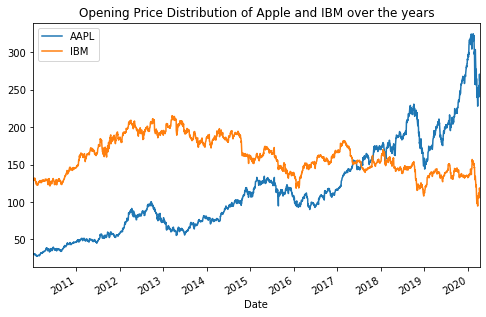

In [653]:
data.plot(figsize=(8,5))
plt.title("Opening Price Distribution of Apple and IBM over the years")
plt.show()

In [654]:
tickers=['AAPL','IBM']
data1=pd.DataFrame()
for t in tickers:
    data1[t]=wb.DataReader(t,data_source='yahoo',start='2010-1-1')['Close']

In [655]:
data1.head()

,AAPL,IBM
Date,,
2010-01-04,30.572857,132.449997
2010-01-05,30.625713,130.850006
2010-01-06,30.138571,130.000000
2010-01-07,30.082857,129.550003
2010-01-08,30.282858,130.850006


In [656]:
data1.tail()

,AAPL,IBM
Date,,
2020-04-02,244.929993,110.000000
2020-04-03,241.410004,106.339996
2020-04-06,262.470001,114.820000
2020-04-07,259.429993,114.940002
2020-04-08,266.070007,119.290001


In [657]:
print(np.average(data['AAPL']))
print(np.average(data['IBM']))

115.03544340340346
161.11613778802263


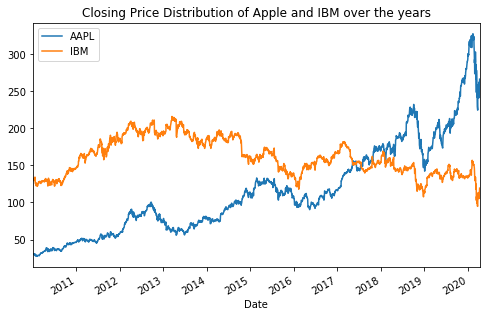

In [658]:
data1.plot(figsize=(8,5))
plt.title("Closing Price Distribution of Apple and IBM over the years")
plt.show()

# Financial Statement Analysis

# Financial Statement for Apple Inc. (AAPL)

In [659]:
Y = 'AAPL'

In [660]:
url_bs = 'https://finance.yahoo.com/quote/' + Y + '/balance-sheet?p=' + Y
url_is = 'https://finance.yahoo.com/quote/' + Y + '/financials?p=' + Y
url_cf = 'https://finance.yahoo.com/quote/' + Y + '/cash-flow?p='+ Y


In [661]:
def sheet1(x):
    read_data = ur.urlopen(x).read() 
    soup_is= BeautifulSoup(read_data)
    ls= [] 
    for l in soup_is.find_all('div'): 
        ls.append(l.string) # add each element one by one to the list
 
    ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
    new_ls = list(filter(None,ls))
    new_ls = new_ls[12:]
    data = list(zip(*[iter(new_ls)]*5))
    Statement = pd.DataFrame(data[0:])
    Statement.columns = Statement.iloc[0] # Name columns to first row of dataframe
    Statement = Statement.iloc[1:,] # start to read 1st row
    Statement = Statement.T # transpose dataframe
    Statement.columns = Statement.iloc[0] #Name columns to first row of dataframe
    Statement.drop(Statement.index[0],inplace=True) #Drop first index row
    Statement.index.name = '' # Remove the index name
    return(Statement)
    
    
    
    
    

In [662]:
balance_sheet=sheet1(url_bs)
balance_sheet

Quarterly,Cash And Cash Equivalents,Other Short Term Investments,Total Cash,Net Receivables,Inventory,Other Current Assets,Total Current Assets,"Gross property, plant and equipment",Accumulated Depreciation,"Net property, plant and equipment",...,Deferred taxes liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total Liabilities,Common Stock,Retained Earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
9/30/2019,"48,844,000","51,713,000","100,557,000","22,926,000","4,106,000","12,352,000","162,819,000","95,957,000","-58,579,000","37,378,000",...,-,-,"20,958,000","142,310,000","248,028,000","45,174,000","45,898,000","-584,000","90,488,000","338,516,000"
9/30/2018,"25,913,000","40,388,000","66,301,000","23,186,000","3,956,000","12,087,000","131,339,000","90,403,000","-49,099,000","41,304,000",...,"426,000","2,797,000","11,165,000","141,712,000","258,578,000","40,201,000","70,400,000","-3,454,000","107,147,000","365,725,000"
9/30/2017,"20,289,000","53,892,000","74,181,000","17,874,000","4,855,000","13,936,000","128,645,000","75,076,000","-41,293,000","33,783,000",...,"31,504,000","2,836,000","8,911,000","140,458,000","241,272,000","35,867,000","98,330,000","-150,000","134,047,000","375,319,000"
9/30/2016,"20,484,000","46,671,000","67,155,000","15,754,000","2,132,000","8,283,000","106,869,000","61,245,000","-34,235,000","27,010,000",...,"26,019,000","2,930,000","10,055,000","114,431,000","193,437,000","31,251,000","96,364,000","634,000","128,249,000","321,686,000"


In [663]:
balance_sheet.T

,9/30/2019,9/30/2018,9/30/2017,9/30/2016
Quarterly,,,,
Cash And Cash Equivalents,"48,844,000","25,913,000","20,289,000","20,484,000"
Other Short Term Investments,"51,713,000","40,388,000","53,892,000","46,671,000"
Total Cash,"100,557,000","66,301,000","74,181,000","67,155,000"
Net Receivables,"22,926,000","23,186,000","17,874,000","15,754,000"
Inventory,"4,106,000","3,956,000","4,855,000","2,132,000"
Other Current Assets,"12,352,000","12,087,000","13,936,000","8,283,000"
Total Current Assets,"162,819,000","131,339,000","128,645,000","106,869,000"
"Gross property, plant and equipment","95,957,000","90,403,000","75,076,000","61,245,000"
Accumulated Depreciation,"-58,579,000","-49,099,000","-41,293,000","-34,235,000"


In [664]:
def sheet(x):
    read_data = ur.urlopen(x).read() 
    soup_is= BeautifulSoup(read_data)
    ls= [] 
    for l in soup_is.find_all('div'): 
        ls.append(l.string) # add each element one by one to the list
 
    ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
    new_ls = list(filter(None,ls))
    new_ls = new_ls[12:]
    data = list(zip(*[iter(new_ls)]*6))
    Statement = pd.DataFrame(data[0:])
    Statement.columns = Statement.iloc[0] # Name columns to first row of dataframe
    Statement = Statement.iloc[1:,] # start to read 1st row
    Statement = Statement.T # transpose dataframe
    Statement.columns = Statement.iloc[0] #Name columns to first row of dataframe
    Statement.drop(Statement.index[0],inplace=True) #Drop first index row
    Statement.index.name = '' # Remove the index name
    Statement.drop(Statement.index[0],inplace=True)
    return(Statement)

In [665]:
income_sheet=sheet(url_is)
cash_flow=sheet(url_cf)

In [666]:
income_sheet

Quarterly,Total Revenue,Cost of Revenue,Gross Profit,Research Development,Selling General and Administrative,Total Operating Expenses,Operating Income or Loss,Interest Expense,Total Other Income/Expenses Net,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Net Income,Net Income available to common shareholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,EBITDA
,,,,,,,,,,,,,,,,,,,
9/30/2019,"260,174,000","161,782,000","98,392,000","16,217,000","18,245,000","34,462,000","63,930,000","3,576,000","422,000","65,737,000","10,481,000","55,256,000","55,256,000","55,256,000",11.97,11.89,"4,617,834","4,648,913","81,860,000"
9/30/2018,"265,595,000","163,756,000","101,839,000","14,236,000","16,705,000","30,941,000","70,898,000","3,240,000","-441,000","72,903,000","13,372,000","59,531,000","59,531,000","59,531,000",12.01,11.91,"4,955,377","5,000,109","87,046,000"
9/30/2017,"229,234,000","141,048,000","88,186,000","11,581,000","15,261,000","26,842,000","61,344,000","2,323,000","-133,000","64,089,000","15,738,000","48,351,000","48,351,000","48,351,000",9.27,9.21,"5,217,242","5,251,692","76,569,000"
9/30/2016,"215,639,000","131,376,000","84,263,000","10,045,000","14,194,000","24,239,000","60,024,000","1,456,000","-1,195,000","61,372,000","15,685,000","45,687,000","45,687,000","45,687,000",8.35,8.31,"5,470,820","5,500,281","73,333,000"


In [667]:
cash_flow

Quarterly,Net Income,Depreciation & amortization,Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,Accounts Payable,Other working capital,Other non-cash items,...,Common stock repurchased,Dividends Paid,Other financing activites,Net cash used privided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
,,,,,,,,,,,,,,,,,,,,,
9/30/2019,"55,256,000","12,547,000","-340,000","6,068,000","-3,488,000","245,000","-289,000","-1,923,000","58,896,000","-652,000",...,"-66,897,000","-14,119,000","-2,922,000","-90,976,000","24,311,000","25,913,000","50,224,000","69,391,000","-10,495,000","58,896,000"
9/30/2018,"59,531,000","10,903,000","-32,590,000","5,340,000","34,694,000","-5,322,000","828,000","9,175,000","64,121,000","-444,000",...,"-72,738,000","-13,712,000","-2,527,000","-87,876,000","5,624,000","20,289,000","25,913,000","77,434,000","-13,313,000","64,121,000"
9/30/2017,"48,351,000","10,157,000","5,966,000","4,840,000","-5,550,000","-2,093,000","-2,723,000","9,618,000","50,803,000","-166,000",...,"-32,900,000","-12,769,000","-1,247,000","-17,347,000","-195,000","20,484,000","20,289,000","63,598,000","-12,795,000","50,803,000"
9/30/2016,"45,687,000","10,505,000","4,938,000","4,210,000","484,000","1,095,000","217,000","1,791,000","52,276,000",-,...,"-29,722,000","-12,150,000","-1,163,000","-20,483,000","-636,000","21,120,000","20,484,000","65,824,000","-13,548,000","52,276,000"


# Financial Statement for International Business Machines Corporation (IBM)

In [668]:
Y1 = 'IBM'
url_bs = 'https://finance.yahoo.com/quote/' + Y1 + '/balance-sheet?p=' + Y1
url_is = 'https://finance.yahoo.com/quote/' + Y1 + '/financials?p=' + Y1
url_cf = 'https://finance.yahoo.com/quote/' + Y1 + '/cash-flow?p='+ Y1

In [669]:
balance_sheet1=sheet1(url_bs)
balance_sheet1

Quarterly,Cash And Cash Equivalents,Other Short Term Investments,Total Cash,Net Receivables,Inventory,Other Current Assets,Total Current Assets,"Gross property, plant and equipment",Accumulated Depreciation,"Net property, plant and equipment",...,Deferred taxes liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total Liabilities,Common Stock,Retained Earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
12/31/2019,"8,172,000","696,000","8,868,000","7,870,000","1,619,000",-,"38,420,000","37,023,000","-22,018,000","15,005,000",...,"5,230,000","3,851,000","1,238,000","93,500,000","131,201,000","55,895,000","162,954,000","-28,597,000","20,841,000","152,186,000"
12/31/2018,"11,379,000","618,000","11,997,000","7,432,000","1,682,000","1,000","49,146,000","32,461,000","-21,668,000","10,793,000",...,"3,696,000","3,445,000","1,718,000","68,225,000","106,452,000","55,151,000","159,206,000","-29,490,000","16,796,000","123,382,000"
12/31/2017,"11,972,000","608,000","12,580,000","8,928,000","1,583,000",-,"49,735,000","32,331,000","-21,215,000","11,116,000",...,"545,000","3,746,000","1,721,000","70,268,000","107,631,000","54,566,000","153,126,000","-26,592,000","17,594,000","125,356,000"
12/31/2016,"7,826,000","701,000","8,527,000","9,182,000","1,553,000","-1,000","43,888,000","30,134,000","-19,303,000","10,831,000",...,"424,000","3,600,000","1,778,000","62,803,000","99,078,000","53,935,000","152,759,000","-29,398,000","18,246,000","117,470,000"


In [670]:
def sheet2(x):
    read_data = ur.urlopen(x).read() 
    soup_is= BeautifulSoup(read_data)
    ls= [] 
    for l in soup_is.find_all('div'): 
        ls.append(l.string) # add each element one by one to the list
 
    ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
    new_ls = list(filter(None,ls))
    new_ls = new_ls[12:]
    data = list(zip(*[iter(new_ls)]*6))
    Statement = pd.DataFrame(data[0:])
    Statement.columns = Statement.iloc[0] # Name columns to first row of dataframe
    Statement = Statement.iloc[1:,] # start to read 1st row
    Statement = Statement.T # transpose dataframe
    Statement.columns = Statement.iloc[0] #Name columns to first row of dataframe
    Statement.drop(Statement.index[0],inplace=True) #Drop first index row
    Statement.index.name = '' # Remove the index name
    Statement.drop(Statement.index[0],inplace=True)
    return(Statement)

In [671]:
income_sheet1=sheet2(url_is)
cash_flow1=sheet2(url_cf)

In [672]:
income_sheet1

Quarterly,Total Revenue,Cost of Revenue,Gross Profit,Research Development,Selling General and Administrative,Total Operating Expenses,Operating Income or Loss,Interest Expense,Total Other Income/Expenses Net,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Net Income,Net Income available to common shareholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,EBITDA
,,,,,,,,,,,,,,,,,,,
12/31/2019,"77,147,000","40,659,000","36,488,000","5,989,000","19,754,000","25,857,000","10,631,000","1,344,000","529,000","10,166,000","731,000","9,435,000","9,431,000","9,431,000",-,-,-,-,"17,569,000"
12/31/2018,"79,590,000","42,655,000","36,936,000","5,379,000","18,863,000","23,651,000","13,285,000","723,000","-1,482,000","11,342,000","2,619,000","8,723,000","8,728,000","8,728,000",9.57,9.52,"912,000","916,300","16,545,000"
12/31/2017,"79,139,000","42,913,000","36,227,000","5,787,000","19,555,000","24,372,000","11,855,000","615,000","17,000","11,400,000","5,642,000","5,758,000","5,753,000","5,753,000",6.17,6.14,"932,800","937,400","16,556,000"
12/31/2016,"79,920,000","41,625,000","38,294,000","5,751,000","20,479,000","25,102,000","13,192,000","630,000","-339,000","12,330,000","449,000","11,881,000","11,872,000","11,872,000",12.43,12.38,"955,400","958,700","17,341,000"


In [673]:
cash_flow1 

Quarterly,Net Income,Depreciation & amortization,Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,Accounts Payable,Other working capital,Other non-cash items,...,Common stock repurchased,Dividends Paid,Other financing activites,Net cash used privided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
,,,,,,,,,,,,,,,,,,,,,
12/31/2019,"9,431,000","6,059,000","-1,527,000","679,000","1,225,000","491,000","67,000","-503,000","11,863,000","-1,000",...,"-1,633,000","-5,707,000","98,000","9,043,000","-3,290,000","11,604,000","8,314,000","14,770,000","-2,907,000","11,863,000"
12/31/2018,"8,728,000","4,480,000","853,000","510,000","554,000","-345,000","-127,000","126,000","11,283,000","-1,000",...,"-4,614,000","-5,666,000","112,000","-10,470,000","-630,000","12,234,000","11,604,000","15,247,000","-3,964,000","11,283,000"
12/31/2017,"5,753,000","4,541,000","-931,000","534,000","6,813,000","419,000","18,000","47,000","12,951,000","1,000",...,"-4,533,000","-5,506,000","-1,000","-6,417,000","4,146,000","7,826,000","11,972,000","16,724,000","-3,773,000","12,951,000"
12/31/2016,"11,872,000","4,381,000","-1,132,000","544,000","1,231,000","1,218,000","-14,000","197,000","12,808,000",-,...,"-3,502,000","-5,256,000",-,"-5,791,000","140,000","7,686,000","7,826,000","16,958,000","-4,150,000","12,808,000"


# Income Statement Analysis for Apple Inc

In [674]:
income_sheet.T

,9/30/2019,9/30/2018,9/30/2017,9/30/2016
Quarterly,,,,
Total Revenue,"260,174,000","265,595,000","229,234,000","215,639,000"
Cost of Revenue,"161,782,000","163,756,000","141,048,000","131,376,000"
Gross Profit,"98,392,000","101,839,000","88,186,000","84,263,000"
Research Development,"16,217,000","14,236,000","11,581,000","10,045,000"
Selling General and Administrative,"18,245,000","16,705,000","15,261,000","14,194,000"
Total Operating Expenses,"34,462,000","30,941,000","26,842,000","24,239,000"
Operating Income or Loss,"63,930,000","70,898,000","61,344,000","60,024,000"
Interest Expense,"3,576,000","3,240,000","2,323,000","1,456,000"
Total Other Income/Expenses Net,"422,000","-441,000","-133,000","-1,195,000"


In [675]:
new_inco=income_sheet

In [676]:
new_inco

Quarterly,Total Revenue,Cost of Revenue,Gross Profit,Research Development,Selling General and Administrative,Total Operating Expenses,Operating Income or Loss,Interest Expense,Total Other Income/Expenses Net,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Net Income,Net Income available to common shareholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,EBITDA
,,,,,,,,,,,,,,,,,,,
9/30/2019,"260,174,000","161,782,000","98,392,000","16,217,000","18,245,000","34,462,000","63,930,000","3,576,000","422,000","65,737,000","10,481,000","55,256,000","55,256,000","55,256,000",11.97,11.89,"4,617,834","4,648,913","81,860,000"
9/30/2018,"265,595,000","163,756,000","101,839,000","14,236,000","16,705,000","30,941,000","70,898,000","3,240,000","-441,000","72,903,000","13,372,000","59,531,000","59,531,000","59,531,000",12.01,11.91,"4,955,377","5,000,109","87,046,000"
9/30/2017,"229,234,000","141,048,000","88,186,000","11,581,000","15,261,000","26,842,000","61,344,000","2,323,000","-133,000","64,089,000","15,738,000","48,351,000","48,351,000","48,351,000",9.27,9.21,"5,217,242","5,251,692","76,569,000"
9/30/2016,"215,639,000","131,376,000","84,263,000","10,045,000","14,194,000","24,239,000","60,024,000","1,456,000","-1,195,000","61,372,000","15,685,000","45,687,000","45,687,000","45,687,000",8.35,8.31,"5,470,820","5,500,281","73,333,000"


In [677]:
I1 = pd.DataFrame() 

#### Gross Margin

In [678]:
Profit = new_inco['Gross Profit'].str.replace(',', '').astype(int)
tot = new_inco['Total Revenue'].str.replace(',', '').astype(int)
I1['Gross Profit Margin'] = round((Profit/tot)*100,2)
I1

,Gross Profit Margin
,
9/30/2019,37.82
9/30/2018,38.34
9/30/2017,38.47
9/30/2016,39.08


#### Research and development (R&D) to sales

In [679]:
RD = new_inco['Research Development'].str.replace(',', '').astype(int)
I1['Research and development (R&D) to sales'] = round((RD/tot)*100,2)
I1

,Gross Profit Margin,Research and development (R&D) to sales
,,
9/30/2019,37.82,6.23
9/30/2018,38.34,5.36
9/30/2017,38.47,5.05
9/30/2016,39.08,4.66


#### Operating Margin

In [680]:
Operating = new_inco['Operating Income or Loss'].str.replace(',', '').astype(int)
I1['Operating margin'] = round((Operating/tot)*100,2)
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin
,,,
9/30/2019,37.82,6.23,24.57
9/30/2018,38.34,5.36,26.69
9/30/2017,38.47,5.05,26.76
9/30/2016,39.08,4.66,27.84


#### Interest Coverage Ratio 

In [681]:
EBIT = new_inco['EBITDA'].str.replace(',', '').astype(int)
interest = new_inco['Interest Expense'].str.replace(',', '').astype(int)
I1['Interest coverage ratio'] = round((EBIT/interest),2)
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio
,,,,
9/30/2019,37.82,6.23,24.57,22.89
9/30/2018,38.34,5.36,26.69,26.87
9/30/2017,38.47,5.05,26.76,32.96
9/30/2016,39.08,4.66,27.84,50.37


#### Net Profit Margin 

In [682]:
net = new_inco['Net Income'].str.replace(',', '').astype(int)
I1['Net Profit Margin'] = round((net/tot)*100,2)
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin
,,,,,
9/30/2019,37.82,6.23,24.57,22.89,21.24
9/30/2018,38.34,5.36,26.69,26.87,22.41
9/30/2017,38.47,5.05,26.76,32.96,21.09
9/30/2016,39.08,4.66,27.84,50.37,21.19


#### Return on Equity (ROE) 

In [683]:
net_pro = new_inco['Net Income available to common shareholders'].str.replace(',', '').astype(int)
share_equity = balance_sheet['Total stockholders\' equity'].str.replace(',', '').astype(int)
I1['ROE'] = round((net_pro/share_equity),2)
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE
,,,,,,
9/30/2019,37.82,6.23,24.57,22.89,21.24,0.61
9/30/2018,38.34,5.36,26.69,26.87,22.41,0.56
9/30/2017,38.47,5.05,26.76,32.96,21.09,0.36
9/30/2016,39.08,4.66,27.84,50.37,21.19,0.36


#### Asset Turnover 

In [684]:
asset = balance_sheet['Total Current Assets'].str.replace(',', '').astype(int)
I1['Asset Turnover'] = round((tot/asset),2)
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE,Asset Turnover
,,,,,,,
9/30/2019,37.82,6.23,24.57,22.89,21.24,0.61,1.60
9/30/2018,38.34,5.36,26.69,26.87,22.41,0.56,2.02
9/30/2017,38.47,5.05,26.76,32.96,21.09,0.36,1.78
9/30/2016,39.08,4.66,27.84,50.37,21.19,0.36,2.02


#  Income Statement Analysis for IBM

In [685]:
income_sheet1

Quarterly,Total Revenue,Cost of Revenue,Gross Profit,Research Development,Selling General and Administrative,Total Operating Expenses,Operating Income or Loss,Interest Expense,Total Other Income/Expenses Net,Income Before Tax,Income Tax Expense,Income from Continuing Operations,Net Income,Net Income available to common shareholders,Basic EPS,Diluted EPS,Basic Average Shares,Diluted Average Shares,EBITDA
,,,,,,,,,,,,,,,,,,,
12/31/2019,"77,147,000","40,659,000","36,488,000","5,989,000","19,754,000","25,857,000","10,631,000","1,344,000","529,000","10,166,000","731,000","9,435,000","9,431,000","9,431,000",-,-,-,-,"17,569,000"
12/31/2018,"79,590,000","42,655,000","36,936,000","5,379,000","18,863,000","23,651,000","13,285,000","723,000","-1,482,000","11,342,000","2,619,000","8,723,000","8,728,000","8,728,000",9.57,9.52,"912,000","916,300","16,545,000"
12/31/2017,"79,139,000","42,913,000","36,227,000","5,787,000","19,555,000","24,372,000","11,855,000","615,000","17,000","11,400,000","5,642,000","5,758,000","5,753,000","5,753,000",6.17,6.14,"932,800","937,400","16,556,000"
12/31/2016,"79,920,000","41,625,000","38,294,000","5,751,000","20,479,000","25,102,000","13,192,000","630,000","-339,000","12,330,000","449,000","11,881,000","11,872,000","11,872,000",12.43,12.38,"955,400","958,700","17,341,000"


In [686]:
I2 = pd.DataFrame() 

#### Gross Margin

In [687]:
Profit = income_sheet1['Gross Profit'].str.replace(',', '').astype(int)
tot = income_sheet1['Total Revenue'].str.replace(',', '').astype(int)
I2['Gross Profit Margin'] = round((Profit/tot)*100,2)
I2

,Gross Profit Margin
,
12/31/2019,47.30
12/31/2018,46.41
12/31/2017,45.78
12/31/2016,47.92


#### Research and development (R&D) to sales

In [688]:
RD = income_sheet1['Research Development'].str.replace(',', '').astype(int)
I2['Research and development (R&D) to sales'] = round((RD/tot)*100,2)
I2

,Gross Profit Margin,Research and development (R&D) to sales
,,
12/31/2019,47.30,7.76
12/31/2018,46.41,6.76
12/31/2017,45.78,7.31
12/31/2016,47.92,7.20


#### Operating Margin

In [689]:
Operating = income_sheet1['Operating Income or Loss'].str.replace(',', '').astype(int)
I2['Operating margin'] = round((Operating/tot)*100,2)
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin
,,,
12/31/2019,47.30,7.76,13.78
12/31/2018,46.41,6.76,16.69
12/31/2017,45.78,7.31,14.98
12/31/2016,47.92,7.20,16.51


#### Interest Coverage Ratio

In [690]:
EBIT = income_sheet1['EBITDA'].str.replace(',', '').astype(int)
interest = income_sheet1['Interest Expense'].str.replace(',', '').astype(int)
I2['Interest coverage ratio'] = round((EBIT/interest),2)
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio
,,,,
12/31/2019,47.30,7.76,13.78,13.07
12/31/2018,46.41,6.76,16.69,22.88
12/31/2017,45.78,7.31,14.98,26.92
12/31/2016,47.92,7.20,16.51,27.53


#### Net Profit Margin 

In [691]:
net = income_sheet1['Net Income'].str.replace(',', '').astype(int)
I2['Net Profit Margin'] = round((net/tot)*100,2)
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin
,,,,,
12/31/2019,47.30,7.76,13.78,13.07,12.22
12/31/2018,46.41,6.76,16.69,22.88,10.97
12/31/2017,45.78,7.31,14.98,26.92,7.27
12/31/2016,47.92,7.20,16.51,27.53,14.85


#### Return on Equity (ROE)

In [692]:
net_pro = income_sheet1['Net Income available to common shareholders'].str.replace(',', '').astype(int)
share_equity = balance_sheet1['Total stockholders\' equity'].str.replace(',', '').astype(int)
I2['ROE'] = round((net_pro/share_equity),2)
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE
,,,,,,
12/31/2019,47.30,7.76,13.78,13.07,12.22,0.45
12/31/2018,46.41,6.76,16.69,22.88,10.97,0.52
12/31/2017,45.78,7.31,14.98,26.92,7.27,0.33
12/31/2016,47.92,7.20,16.51,27.53,14.85,0.65


#### Asset Turnover

In [693]:
asset = balance_sheet1['Total Current Assets'].str.replace(',', '').astype(int)
I2['Asset Turnover'] = round((tot/asset),2)
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE,Asset Turnover
,,,,,,,
12/31/2019,47.30,7.76,13.78,13.07,12.22,0.45,2.01
12/31/2018,46.41,6.76,16.69,22.88,10.97,0.52,1.62
12/31/2017,45.78,7.31,14.98,26.92,7.27,0.33,1.59
12/31/2016,47.92,7.20,16.51,27.53,14.85,0.65,1.82


# Balance Statement Analysis for Apple Inc 

In [694]:
balance_sheet

Quarterly,Cash And Cash Equivalents,Other Short Term Investments,Total Cash,Net Receivables,Inventory,Other Current Assets,Total Current Assets,"Gross property, plant and equipment",Accumulated Depreciation,"Net property, plant and equipment",...,Deferred taxes liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total Liabilities,Common Stock,Retained Earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
9/30/2019,"48,844,000","51,713,000","100,557,000","22,926,000","4,106,000","12,352,000","162,819,000","95,957,000","-58,579,000","37,378,000",...,-,-,"20,958,000","142,310,000","248,028,000","45,174,000","45,898,000","-584,000","90,488,000","338,516,000"
9/30/2018,"25,913,000","40,388,000","66,301,000","23,186,000","3,956,000","12,087,000","131,339,000","90,403,000","-49,099,000","41,304,000",...,"426,000","2,797,000","11,165,000","141,712,000","258,578,000","40,201,000","70,400,000","-3,454,000","107,147,000","365,725,000"
9/30/2017,"20,289,000","53,892,000","74,181,000","17,874,000","4,855,000","13,936,000","128,645,000","75,076,000","-41,293,000","33,783,000",...,"31,504,000","2,836,000","8,911,000","140,458,000","241,272,000","35,867,000","98,330,000","-150,000","134,047,000","375,319,000"
9/30/2016,"20,484,000","46,671,000","67,155,000","15,754,000","2,132,000","8,283,000","106,869,000","61,245,000","-34,235,000","27,010,000",...,"26,019,000","2,930,000","10,055,000","114,431,000","193,437,000","31,251,000","96,364,000","634,000","128,249,000","321,686,000"


In [695]:
I3 = pd.DataFrame()

#### Working Capital  

In [696]:
tot_current_assets = balance_sheet['Total Current Assets'].str.replace(',', '').astype(int)
tot_current_liabilities = balance_sheet['Total Current Liabilities'].str.replace(',', '').astype(int)
I3['Working Capital'] = tot_current_assets - tot_current_liabilities
I3

,Working Capital
,
9/30/2019,57101000
9/30/2018,14473000
9/30/2017,27831000
9/30/2016,27863000


#### Working capital per dollar of sales  

In [697]:
tot = new_inco['Total Revenue'].str.replace(',', '').astype(int)
I3['Working capital per dollar of sales'] =I3['Working Capital'] / tot
I3

,Working Capital,Working capital per dollar of sales
,,
9/30/2019,57101000,0.219472
9/30/2018,14473000,0.054493
9/30/2017,27831000,0.121409
9/30/2016,27863000,0.129211


#### Quick Ratio( Acid Test Ratio)

##### Quick Assets

 

In [698]:
inventory = balance_sheet['Inventory'].str.replace(',', '').astype(int)
I3['Quick_assets'] = tot_current_assets - inventory
I3

,Working Capital,Working capital per dollar of sales,Quick_assets
,,,
9/30/2019,57101000,0.219472,158713000
9/30/2018,14473000,0.054493,127383000
9/30/2017,27831000,0.121409,123790000
9/30/2016,27863000,0.129211,104737000


In [699]:
I3['Acid Test Ratio'] = I3['Quick_assets']/tot_current_liabilities
I3

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio
,,,,
9/30/2019,57101000,0.219472,158713000,1.501286
9/30/2018,14473000,0.054493,127383000,1.089992
9/30/2017,27831000,0.121409,123790000,1.227905
9/30/2016,27863000,0.129211,104737000,1.325684


##  Current Ratio

In [700]:
I3['Current Ratio'] = tot_current_assets/tot_current_liabilities
I3

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio
,,,,,
9/30/2019,57101000,0.219472,158713000,1.501286,1.540126
9/30/2018,14473000,0.054493,127383000,1.089992,1.123843
9/30/2017,27831000,0.121409,123790000,1.227905,1.276063
9/30/2016,27863000,0.129211,104737000,1.325684,1.352669


## Debt to Equity Ratio 

In [701]:
total_liabilities = balance_sheet['Total Liabilities'].str.replace(',', '').astype(int)
shareholders_equity = balance_sheet['Total stockholders\' equity'].str.replace(',', '').astype(int)
debt_to_equity_ratio = total_liabilities / shareholders_equity
I3['Debt to Equity Ratio'] = debt_to_equity_ratio
I3

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio,Debt to Equity Ratio
,,,,,,
9/30/2019,57101000,0.219472,158713000,1.501286,1.540126,2.741004
9/30/2018,14473000,0.054493,127383000,1.089992,1.123843,2.413301
9/30/2017,27831000,0.121409,123790000,1.227905,1.276063,1.799906
9/30/2016,27863000,0.129211,104737000,1.325684,1.352669,1.508292


# Balance Statement Analysis for IBM

In [702]:
balance_sheet1

Quarterly,Cash And Cash Equivalents,Other Short Term Investments,Total Cash,Net Receivables,Inventory,Other Current Assets,Total Current Assets,"Gross property, plant and equipment",Accumulated Depreciation,"Net property, plant and equipment",...,Deferred taxes liabilities,Deferred revenues,Other long-term liabilities,Total non-current liabilities,Total Liabilities,Common Stock,Retained Earnings,Accumulated other comprehensive income,Total stockholders' equity,Total liabilities and stockholders' equity
,,,,,,,,,,,,,,,,,,,,,
12/31/2019,"8,172,000","696,000","8,868,000","7,870,000","1,619,000",-,"38,420,000","37,023,000","-22,018,000","15,005,000",...,"5,230,000","3,851,000","1,238,000","93,500,000","131,201,000","55,895,000","162,954,000","-28,597,000","20,841,000","152,186,000"
12/31/2018,"11,379,000","618,000","11,997,000","7,432,000","1,682,000","1,000","49,146,000","32,461,000","-21,668,000","10,793,000",...,"3,696,000","3,445,000","1,718,000","68,225,000","106,452,000","55,151,000","159,206,000","-29,490,000","16,796,000","123,382,000"
12/31/2017,"11,972,000","608,000","12,580,000","8,928,000","1,583,000",-,"49,735,000","32,331,000","-21,215,000","11,116,000",...,"545,000","3,746,000","1,721,000","70,268,000","107,631,000","54,566,000","153,126,000","-26,592,000","17,594,000","125,356,000"
12/31/2016,"7,826,000","701,000","8,527,000","9,182,000","1,553,000","-1,000","43,888,000","30,134,000","-19,303,000","10,831,000",...,"424,000","3,600,000","1,778,000","62,803,000","99,078,000","53,935,000","152,759,000","-29,398,000","18,246,000","117,470,000"


In [703]:
I4 = pd.DataFrame()

#### Working Capital

In [704]:
tot_current_assets = balance_sheet1['Total Current Assets'].str.replace(',', '').astype(int)
tot_current_liabilities = balance_sheet1['Total Current Liabilities'].str.replace(',', '').astype(int)
I4['Working Capital'] = tot_current_assets - tot_current_liabilities
I4

,Working Capital
,
12/31/2019,719000
12/31/2018,10919000
12/31/2017,12372000
12/31/2016,7613000


#### Working capital per dollar of sales

In [705]:
tot = income_sheet1['Total Revenue'].str.replace(',', '').astype(int)
I4['Working capital per dollar of sales'] =I4['Working Capital'] / tot
I4

,Working Capital,Working capital per dollar of sales
,,
12/31/2019,719000,0.009320
12/31/2018,10919000,0.137191
12/31/2017,12372000,0.156333
12/31/2016,7613000,0.095258


#### Acid Test Ratio

##### Quick Assets 

In [706]:
inventory = balance_sheet1['Inventory'].str.replace(',', '').astype(int)
I4['Quick_assets'] = tot_current_assets - inventory
I4

,Working Capital,Working capital per dollar of sales,Quick_assets
,,,
12/31/2019,719000,0.009320,36801000
12/31/2018,10919000,0.137191,47464000
12/31/2017,12372000,0.156333,48152000
12/31/2016,7613000,0.095258,42335000


In [707]:
I4['Acid Test Ratio'] = I4['Quick_assets']/tot_current_liabilities
I4

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio
,,,,
12/31/2019,719000,0.009320,36801000,0.976128
12/31/2018,10919000,0.137191,47464000,1.241635
12/31/2017,12372000,0.156333,48152000,1.288762
12/31/2016,7613000,0.095258,42335000,1.167057


#### Current Ratio

In [708]:
I4['Current Ratio'] = tot_current_assets/tot_current_liabilities
I4

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio
,,,,,
12/31/2019,719000,0.009320,36801000,0.976128,1.019071
12/31/2018,10919000,0.137191,47464000,1.241635,1.285636
12/31/2017,12372000,0.156333,48152000,1.288762,1.331130
12/31/2016,7613000,0.095258,42335000,1.167057,1.209869


## Debt to Equity Ratio 

In [709]:
total_liabilities = balance_sheet1['Total Liabilities'].str.replace(',', '').astype(int)
shareholders_equity = balance_sheet1['Total stockholders\' equity'].str.replace(',', '').astype(int)
debt_to_equity_ratio = total_liabilities / shareholders_equity
I4['Debt to Equity Ratio'] = debt_to_equity_ratio
I4

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio,Debt to Equity Ratio
,,,,,,
12/31/2019,719000,0.009320,36801000,0.976128,1.019071,6.295331
12/31/2018,10919000,0.137191,47464000,1.241635,1.285636,6.337938
12/31/2017,12372000,0.156333,48152000,1.288762,1.331130,6.117483
12/31/2016,7613000,0.095258,42335000,1.167057,1.209869,5.430122


# Cash flow Statement Analysis for Apple Inc

In [710]:
cash_flow

Quarterly,Net Income,Depreciation & amortization,Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,Accounts Payable,Other working capital,Other non-cash items,...,Common stock repurchased,Dividends Paid,Other financing activites,Net cash used privided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
,,,,,,,,,,,,,,,,,,,,,
9/30/2019,"55,256,000","12,547,000","-340,000","6,068,000","-3,488,000","245,000","-289,000","-1,923,000","58,896,000","-652,000",...,"-66,897,000","-14,119,000","-2,922,000","-90,976,000","24,311,000","25,913,000","50,224,000","69,391,000","-10,495,000","58,896,000"
9/30/2018,"59,531,000","10,903,000","-32,590,000","5,340,000","34,694,000","-5,322,000","828,000","9,175,000","64,121,000","-444,000",...,"-72,738,000","-13,712,000","-2,527,000","-87,876,000","5,624,000","20,289,000","25,913,000","77,434,000","-13,313,000","64,121,000"
9/30/2017,"48,351,000","10,157,000","5,966,000","4,840,000","-5,550,000","-2,093,000","-2,723,000","9,618,000","50,803,000","-166,000",...,"-32,900,000","-12,769,000","-1,247,000","-17,347,000","-195,000","20,484,000","20,289,000","63,598,000","-12,795,000","50,803,000"
9/30/2016,"45,687,000","10,505,000","4,938,000","4,210,000","484,000","1,095,000","217,000","1,791,000","52,276,000",-,...,"-29,722,000","-12,150,000","-1,163,000","-20,483,000","-636,000","21,120,000","20,484,000","65,824,000","-13,548,000","52,276,000"


In [711]:
cash_flow.T

,9/30/2019,9/30/2018,9/30/2017,9/30/2016
Quarterly,,,,
Net Income,"55,256,000","59,531,000","48,351,000","45,687,000"
Depreciation & amortization,"12,547,000","10,903,000","10,157,000","10,505,000"
Deferred income taxes,"-340,000","-32,590,000","5,966,000","4,938,000"
Stock based compensation,"6,068,000","5,340,000","4,840,000","4,210,000"
Change in working capital,"-3,488,000","34,694,000","-5,550,000","484,000"
Accounts receivable,"245,000","-5,322,000","-2,093,000","1,095,000"
Inventory,"-289,000","828,000","-2,723,000","217,000"
Accounts Payable,"-1,923,000","9,175,000","9,618,000","1,791,000"
Other working capital,"58,896,000","64,121,000","50,803,000","52,276,000"


In [712]:
I5 = pd.DataFrame()

### Current Liability Coverage Ratio

In [713]:
net_cash_from_operating_activites = cash_flow['Net cash provided by operating activites'].str.replace(',', '').astype(int)
average_current_liabilities = (balance_sheet['Total Current Liabilities'].str.replace(',', '').astype(int))
current_liability_coverage_ratio = net_cash_from_operating_activites / average_current_liabilities
I5['Current Liability Coverage Ratio'] = current_liability_coverage_ratio
I5

,Current Liability Coverage Ratio
,
9/30/2019,0.656378
9/30/2018,0.662588
9/30/2017,0.630845
9/30/2016,0.833152


## Cash Flow Margin Ratio 

In [714]:
operating_cash_flow =cash_flow['Operating Cash Flow'].str.replace(',', '').astype(int)
net_sales =income_sheet['Total Revenue'].str.replace(',', '').astype(int)
cash_flow_margin_ratio = operating_cash_flow / net_sales
I5['Cash Flow Margin Ratio'] = cash_flow_margin_ratio
I5

,Current Liability Coverage Ratio,Cash Flow Margin Ratio
,,
9/30/2019,0.656378,0.266710
9/30/2018,0.662588,0.291549
9/30/2017,0.630845,0.277437
9/30/2016,0.833152,0.305251


## Cash Flow Coverage Ratio 

In [715]:
total_debt = balance_sheet['Long Term Debt'].str.replace(',', '').astype(int)
cash_flow_coverage_ratio = operating_cash_flow / total_debt
I5['Cash Flow Coverage Ratio'] = cash_flow_coverage_ratio
I5

,Current Liability Coverage Ratio,Cash Flow Margin Ratio,Cash Flow Coverage Ratio
,,,
9/30/2019,0.656378,0.266710,0.755836
9/30/2018,0.662588,0.291549,0.826095
9/30/2017,0.630845,0.277437,0.654253
9/30/2016,0.833152,0.305251,0.872685


## Cash flow Statement Analysis for IBM

In [716]:
cash_flow1

Quarterly,Net Income,Depreciation & amortization,Deferred income taxes,Stock based compensation,Change in working capital,Accounts receivable,Inventory,Accounts Payable,Other working capital,Other non-cash items,...,Common stock repurchased,Dividends Paid,Other financing activites,Net cash used privided by (used for) financing activities,Net change in cash,Cash at beginning of period,Cash at end of period,Operating Cash Flow,Capital Expenditure,Free Cash Flow
,,,,,,,,,,,,,,,,,,,,,
12/31/2019,"9,431,000","6,059,000","-1,527,000","679,000","1,225,000","491,000","67,000","-503,000","11,863,000","-1,000",...,"-1,633,000","-5,707,000","98,000","9,043,000","-3,290,000","11,604,000","8,314,000","14,770,000","-2,907,000","11,863,000"
12/31/2018,"8,728,000","4,480,000","853,000","510,000","554,000","-345,000","-127,000","126,000","11,283,000","-1,000",...,"-4,614,000","-5,666,000","112,000","-10,470,000","-630,000","12,234,000","11,604,000","15,247,000","-3,964,000","11,283,000"
12/31/2017,"5,753,000","4,541,000","-931,000","534,000","6,813,000","419,000","18,000","47,000","12,951,000","1,000",...,"-4,533,000","-5,506,000","-1,000","-6,417,000","4,146,000","7,826,000","11,972,000","16,724,000","-3,773,000","12,951,000"
12/31/2016,"11,872,000","4,381,000","-1,132,000","544,000","1,231,000","1,218,000","-14,000","197,000","12,808,000",-,...,"-3,502,000","-5,256,000",-,"-5,791,000","140,000","7,686,000","7,826,000","16,958,000","-4,150,000","12,808,000"


In [717]:
cash_flow1.T

,12/31/2019,12/31/2018,12/31/2017,12/31/2016
Quarterly,,,,
Net Income,"9,431,000","8,728,000","5,753,000","11,872,000"
Depreciation & amortization,"6,059,000","4,480,000","4,541,000","4,381,000"
Deferred income taxes,"-1,527,000","853,000","-931,000","-1,132,000"
Stock based compensation,"679,000","510,000","534,000","544,000"
Change in working capital,"1,225,000","554,000","6,813,000","1,231,000"
Accounts receivable,"491,000","-345,000","419,000","1,218,000"
Inventory,"67,000","-127,000","18,000","-14,000"
Accounts Payable,"-503,000","126,000","47,000","197,000"
Other working capital,"11,863,000","11,283,000","12,951,000","12,808,000"


In [718]:
I6 = pd.DataFrame()

## Current Liability Coverage Ratio

In [719]:
net_cash_from_operating_activites = cash_flow1['Net cash provided by operating activites'].str.replace(',', '').astype(int)
average_current_liabilities = (balance_sheet1['Total Current Liabilities'].str.replace(',', '').astype(int))
current_liability_coverage_ratio = net_cash_from_operating_activites / average_current_liabilities
I6['Current Liability Coverage Ratio'] = current_liability_coverage_ratio
I6

,Current Liability Coverage Ratio
,
12/31/2019,0.391767
12/31/2018,0.398854
12/31/2017,0.447609
12/31/2016,0.467484


## Cash Flow Margin Ratio 

In [720]:
operating_cash_flow =cash_flow1['Operating Cash Flow'].str.replace(',', '').astype(int)
net_sales =income_sheet1['Total Revenue'].str.replace(',', '').astype(int)
cash_flow_margin_ratio = operating_cash_flow / net_sales
I6['Cash Flow Margin Ratio'] = cash_flow_margin_ratio
I6

,Current Liability Coverage Ratio,Cash Flow Margin Ratio
,,
12/31/2019,0.391767,0.191453
12/31/2018,0.398854,0.191569
12/31/2017,0.447609,0.211324
12/31/2016,0.467484,0.212187


## Cash Flow Coverage Ratio 

In [721]:
total_debt = balance_sheet1['Long Term Debt'].str.replace(',', '').astype(int)
cash_flow_coverage_ratio = operating_cash_flow / total_debt
I6['Cash Flow Coverage Ratio'] = cash_flow_coverage_ratio
I6

,Current Liability Coverage Ratio,Cash Flow Margin Ratio,Cash Flow Coverage Ratio
,,,
12/31/2019,0.391767,0.191453,0.273003
12/31/2018,0.398854,0.191569,0.428226
12/31/2017,0.447609,0.211324,0.419811
12/31/2016,0.467484,0.212187,0.489338


## Final Income statement Results for Apple and IBM  respectively.

In [722]:
I1

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE,Asset Turnover
,,,,,,,
9/30/2019,37.82,6.23,24.57,22.89,21.24,0.61,1.60
9/30/2018,38.34,5.36,26.69,26.87,22.41,0.56,2.02
9/30/2017,38.47,5.05,26.76,32.96,21.09,0.36,1.78
9/30/2016,39.08,4.66,27.84,50.37,21.19,0.36,2.02


In [723]:
I2

,Gross Profit Margin,Research and development (R&D) to sales,Operating margin,Interest coverage ratio,Net Profit Margin,ROE,Asset Turnover
,,,,,,,
12/31/2019,47.30,7.76,13.78,13.07,12.22,0.45,2.01
12/31/2018,46.41,6.76,16.69,22.88,10.97,0.52,1.62
12/31/2017,45.78,7.31,14.98,26.92,7.27,0.33,1.59
12/31/2016,47.92,7.20,16.51,27.53,14.85,0.65,1.82


## Final Balance statement Results for Apple and IBM respectively 

In [724]:
I3

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio,Debt to Equity Ratio
,,,,,,
9/30/2019,57101000,0.219472,158713000,1.501286,1.540126,2.741004
9/30/2018,14473000,0.054493,127383000,1.089992,1.123843,2.413301
9/30/2017,27831000,0.121409,123790000,1.227905,1.276063,1.799906
9/30/2016,27863000,0.129211,104737000,1.325684,1.352669,1.508292


In [725]:
I4

,Working Capital,Working capital per dollar of sales,Quick_assets,Acid Test Ratio,Current Ratio,Debt to Equity Ratio
,,,,,,
12/31/2019,719000,0.009320,36801000,0.976128,1.019071,6.295331
12/31/2018,10919000,0.137191,47464000,1.241635,1.285636,6.337938
12/31/2017,12372000,0.156333,48152000,1.288762,1.331130,6.117483
12/31/2016,7613000,0.095258,42335000,1.167057,1.209869,5.430122


## Final Cash Flow statement Results for Apple and IBM respectively 

In [726]:
I5

,Current Liability Coverage Ratio,Cash Flow Margin Ratio,Cash Flow Coverage Ratio
,,,
9/30/2019,0.656378,0.266710,0.755836
9/30/2018,0.662588,0.291549,0.826095
9/30/2017,0.630845,0.277437,0.654253
9/30/2016,0.833152,0.305251,0.872685


In [727]:
I6

,Current Liability Coverage Ratio,Cash Flow Margin Ratio,Cash Flow Coverage Ratio
,,,
12/31/2019,0.391767,0.191453,0.273003
12/31/2018,0.398854,0.191569,0.428226
12/31/2017,0.447609,0.211324,0.419811
12/31/2016,0.467484,0.212187,0.489338


# So by analyzing all the 3 financial statements from Apple Inc and IBM, we can clearly say that Apple is performing much more better than IBM in all the three financial statements. So one should surely invest on or make an acquisition on Apple Inc.